### AIM:
> * To design a DNN with minimum accuracy of 99.2 %

In [0]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

* Loading the data-set

In [0]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

* Reshaping and Normalization

In [23]:
No_of_pixels=x_train.shape[1]*x_train.shape[2]

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test  = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

x_train/=255
x_test/=255

print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


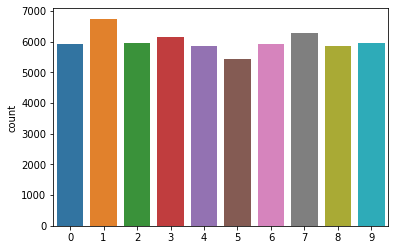

In [24]:
g=sns.countplot(y_train)

*  Splitting the dataset into training, testing and validation datasets

In [0]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1)

* Data Augmentation

In [0]:
data_generator=ImageDataGenerator(rotation_range=10,zoom_range=0.1,width_shift_range=0.1,height_shift_range=0.1)
data_generator.fit(x_train)

* The Hyper-Parameters

In [0]:
No_epochs=18
input_shape=(28,28,1)
learning_rate=0.5
dropout_rate=0.5
batch_size=128

* The Structure of the Deep Neural Network/ The Architecture of the DNN

In [65]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(dropout_rate/2))
model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dropout_rate))
model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_13 (Flatten)         (None, 576)             

* Training the DNN

In [66]:
history = model.fit_generator(data_generator.flow(x_train,y_train, batch_size=batch_size),epochs =No_epochs, validation_data = (x_val,y_val))

Epoch 1/18
422/422 [==============================] - 14s 32ms/step - loss: 0.8225 - acc: 0.7261 - val_loss: 0.1076 - val_acc: 0.9692
Epoch 2/18
422/422 [==============================] - 13s 30ms/step - loss: 0.3041 - acc: 0.9113 - val_loss: 0.0653 - val_acc: 0.9802
Epoch 3/18
422/422 [==============================] - 13s 30ms/step - loss: 0.2259 - acc: 0.9335 - val_loss: 0.0528 - val_acc: 0.9850
Epoch 4/18
422/422 [==============================] - 13s 30ms/step - loss: 0.1811 - acc: 0.9481 - val_loss: 0.0485 - val_acc: 0.9860
Epoch 5/18
422/422 [==============================] - 13s 30ms/step - loss: 0.1614 - acc: 0.9541 - val_loss: 0.0473 - val_acc: 0.9868
Epoch 6/18
422/422 [==============================] - 13s 30ms/step - loss: 0.1489 - acc: 0.9583 - val_loss: 0.0423 - val_acc: 0.9893
Epoch 7/18
422/422 [==============================] - 12s 30ms/step - loss: 0.1319 - acc: 0.9633 - val_loss: 0.0387 - val_acc: 0.9890
Epoch 8/18
422/422 [==============================] - 12s 30ms

* Plotting the loss v/s epochs graph

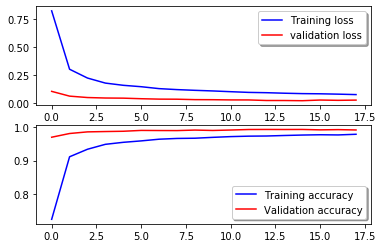

In [67]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

* Evaluating the accuracy

In [68]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 59us/step


[0.019612764685099683, 0.9942]

* Random Testing 

1


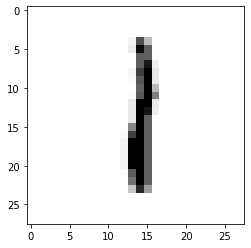

In [47]:
random_index=4010
plt.imshow(x_test[random_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[random_index].reshape(1, 28, 28, 1))
print(pred.argmax())